# Web Scraping with BeautifulSoup

- Web scraping is a big part of getting novel data
- It used to be easy to access webpages just with html parsers like `BeautifulSoup`
- However, with recent paywalls and javascript being used everywhere, it is no longer as easy to access web resources without increasing the machinery
- So in a sense, today's lecture is kind of less about web-scraping and more about the beauty of APIs.
    - Web scraping is still possible, but it often needs other tools, such as `selenium`, which actually creates a virtual browser that you can simulate clicks with.
    - We can totally do this in our special topics!
- 
- In any case, whether through `BeautifulSoup` or through another library, you still need to understand a little bit of html



Let's look at how to install beautiful soup and then this will be our mission:



## Very Fast HTML 

- HTML is the typesetting language of the web
- It's almost like Latex for browsers
- Nowadays, a lot of the html is created automatically through other coding languages like javascript.
- It isn't important to know the fine details, but for our purposes, HTML comes with tags that have attributes
- When we scrape, we are looking for particular tags, and to hone in on what we want, we usually narrow our search by searching for particular attributes.
- Attributes might be created from CSS, a language that is responsible for the layout and format of the HTML. 
    - So we might search for a particular tag in HTML that has CSS attributes that are from a menu, for example.

![](images/html5_cheat_sheet_tags.png)

First install beautiful soup:

`pip install bs4` 

or

`conda install bs4` (probably)

In [5]:
from bs4 import BeautifulSoup

import re ## For parsing

import requests ## For getting the HTML

from wordcloud import WordCloud, STOPWORDS  ## For fun

import backoff

import matplotlib.pyplot as plt

from selenium import webdriver

import json


### Intro to BeautifulSoup

BeautifulSoup takes the html from webpage and turns into an object that you can work with. All the tags and classes that a webpage have become attributes in a `Soup` object.

In [3]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [4]:
soup = BeautifulSoup(html_doc)
soup

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [5]:
soup.html

<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
<a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
</body></html>

In [6]:
soup.head

<head><title>The Dormouse's story</title></head>

In [7]:
soup.title

<title>The Dormouse's story</title>

In [8]:
soup.p

<p class="title"><b>The Dormouse's story</b></p>

In [9]:
soup.a

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

In [10]:
soup.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [11]:
for tag in soup.find_all(True):
    print(tag.name)

html
head
title
body
p
b
p
a
a
a
p


## Now real website!

Let's look at the New york times politics section:

https://www.nytimes.com/section/politics

Seems like a nice look to work from. Let's go to the browser and check what we can see?

In [24]:
## Request the url

url = "https://www.nytimes.com/section/politics"

r= requests.get(url)
r

<Response [200]>

In [25]:
soup = BeautifulSoup(r.text, 'lxml')

In [26]:
soup

<!DOCTYPE html>
<html lang="en" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta charset="utf-8"/>
<title data-rh="true">U.S. Politics - The New York Times</title>
<meta content="Breaking news and analysis on U.S. politics, including the latest coverage of the White House, Congress, the Supreme Court and more." data-rh="true" property="og:description"/><meta content="Breaking news and analysis on U.S. politics, including the latest coverage of the White House, Congress, the Supreme Court and more." data-rh="true" name="description"/><meta content="Breaking news and analysis on U.S. politics, including the latest coverage of the White House, Congress, the Supreme Court and more." data-rh="true" name="description" property="twitter:description"/><meta content="U.S. Politics" data-rh="true" property="og:title"/><meta content="U.S. Politics" data-rh="true" property="twitter:title"/><meta content="https://static01.nyt.com/newsgraphics/images/icons/defaultPromoCrop.png" data-rh=

In [30]:
url_list = []

needed_divs = soup.find_all('article')
for div in needed_divs:
    url_list.append(div.a.get('href'))
    
url_list

['/2023/08/16/us/politics/niger-coup-terrorism-russia.html',
 '/2023/08/16/us/politics/trumps-indictment-georgia-2024.html',
 '/2023/08/16/us/politics/trump-chutkan-2020-election-truth-social.html',
 '/2023/08/16/us/politics/schumer-mccarthy-stopgap-spending-shutdown.html',
 '/2023/08/16/us/politics/biden-inflation-reduction-act.html',
 '/2023/08/16/us/politics/trump-lawyers-fees.html',
 '/2023/08/16/health/abortion-pill-ruling.html',
 '/2023/08/16/us/politics/schumer-mccarthy-stopgap-spending-shutdown.html',
 '/2023/08/16/us/politics/niger-coup-terrorism-russia.html',
 '/2023/08/16/business/economy/federal-reserve-minutes.html',
 '/2023/08/16/us/politics/trumps-indictment-georgia-2024.html',
 '/2023/08/16/us/politics/desantis-campaign-costs.html',
 '/2023/08/16/us/politics/republican-debate-reader-questions.html',
 '/2023/08/16/us/politics/biden-hawaii-maui-wildfires.html']

Now let's go to each website and do our searches for each candidate. But wait!

### A brief foray into decorators and the `backoff` module

Oftentimes, when you loop through many webpages, the loop might break because you're making too many requests at once. 

That's what `backoff` is for. If the website gives an error, `backoff` will catch the exception and make the request again with some pause. The more times the exception is thrown the longer `backoff` will pause before making another one. 

`backoff` works as a decorator function. What's that? It's basically a function takes a function as an argument, but returns some "wrapper" for that function that references a function in it... What does that mean?

In [16]:
def add():
    print('1+2=3') 

add()


1+2=3


But now you wanted to make sure that people knew that this was a function about addition when they called it. You can write something like this:

In [17]:
def i_want_everyone_to_understand(func):
    
    def that_this_is_addition():
        print("just in case you didn't know, this is addition")
        func()
    return that_this_is_addition

add = i_want_everyone_to_understand(add)

add()

just in case you didn't know, this is addition
1+2=3


Instead of writing out the whole function, we can do:


In [18]:
@i_want_everyone_to_understand
def add():
    print("1+2=3")
    
add()

just in case you didn't know, this is addition
1+2=3


So `backoff` does this samething, but it catches exceptions of your function. So let's make out requests getter a function so we can use `backoff` with it.

In [131]:
def backoff_hdlr(details):
    print ("Backing off {wait:0.1f} seconds after {tries} tries "
           "calling function {target} with args {args} and kwargs "
           "{kwargs}".format(**details))

@backoff.on_exception(backoff.expo,
                      requests.exceptions.RequestException,
                      on_backoff=backoff_hdlr)
def requester(url):
    # raise requests.exceptions.RequestException
    return requests.get(url)



In [132]:
# Test how this works

requester("")

Backing off 0.2 seconds after 1 tries calling function <function requester at 0x7fbf7b6fcb80> with args ('',) and kwargs {}
Backing off 0.1 seconds after 2 tries calling function <function requester at 0x7fbf7b6fcb80> with args ('',) and kwargs {}
Backing off 3.7 seconds after 3 tries calling function <function requester at 0x7fbf7b6fcb80> with args ('',) and kwargs {}


KeyboardInterrupt: 

Now let's make our loop that gets the content from the webpage:

In [81]:
base_url = "https://www.nytimes.com"

articles = []

for relative_link in url_list:
    site = requester(base_url + relative_link).content
    # Unsuccessful SIMPLE Selenium
    # driver = webdriver.Firefox()
    # driver.get(base_url + relative_link)
    # html = driver.page_source
    # site = BeautifulSoup(html)
    articles.append(site)
    print(f"Accessing {base_url + relative_link}")

Accessing https://www.nytimes.com/2023/08/16/us/politics/niger-coup-terrorism-russia.html
Accessing https://www.nytimes.com/2023/08/16/us/politics/trumps-indictment-georgia-2024.html
Accessing https://www.nytimes.com/2023/08/16/us/politics/trump-chutkan-2020-election-truth-social.html
Accessing https://www.nytimes.com/2023/08/16/us/politics/schumer-mccarthy-stopgap-spending-shutdown.html
Accessing https://www.nytimes.com/2023/08/16/us/politics/biden-inflation-reduction-act.html
Accessing https://www.nytimes.com/2023/08/16/us/politics/trump-lawyers-fees.html
Accessing https://www.nytimes.com/2023/08/16/health/abortion-pill-ruling.html
Accessing https://www.nytimes.com/2023/08/16/us/politics/schumer-mccarthy-stopgap-spending-shutdown.html
Accessing https://www.nytimes.com/2023/08/16/us/politics/niger-coup-terrorism-russia.html
Accessing https://www.nytimes.com/2023/08/16/business/economy/federal-reserve-minutes.html
Accessing https://www.nytimes.com/2023/08/16/us/politics/trumps-indictme

Now let's sift through and see what we can find. 

In [82]:
articles

[b'<html><head><title>nytimes.com</title><style>#cmsg{animation: A 1.5s;}@keyframes A{0%{opacity:0;}99%{opacity:0;}100%{opacity:1;}}</style></head><body style="margin:0"><p id="cmsg">Please enable JS and disable any ad blocker</p><script data-cfasync="false">var dd={\'rt\':\'c\',\'cid\':\'AHrlqAAAAAMAfpoQNSaug7UARK72JA==\',\'hsh\':\'499AE34129FA4E4FABC31582C3075D\',\'t\':\'bv\',\'s\':17439,\'e\':\'2fb5b1cf9cad685d839863aa434db7ccc6fbe93ecf3e75fdeb033432f1aafae0\',\'host\':\'geo.captcha-delivery.com\'}</script><script data-cfasync="false" src="https://ct.captcha-delivery.com/c.js"></script></body></html>\n',
 b'<html><head><title>nytimes.com</title><style>#cmsg{animation: A 1.5s;}@keyframes A{0%{opacity:0;}99%{opacity:0;}100%{opacity:1;}}</style></head><body style="margin:0"><p id="cmsg">Please enable JS and disable any ad blocker</p><script data-cfasync="false">var dd={\'rt\':\'c\',\'cid\':\'AHrlqAAAAAMAlL3M0uZlMeIARK72JA==\',\'hsh\':\'499AE34129FA4E4FABC31582C3075D\',\'t\':\'bv\',\'s\

- This is the issue with using libraries like `BeautifulSoup`, which are just there to parse through static html: as soon as there's anything *dynamic*, that requires javascript, things become tricky.
- If a website has a paywall or is accessing content dynamically through a server, we can no longer access the content
- But it does seem like we can at least extract article titles!
- Let's backtrack a bit and just scrape each section of the newspaper and extract each article title.

In [76]:
# get just the homepage to extract sections for the newspaper
url = "https://www.nytimes.com/"

r= requests.get(url)

soup = BeautifulSoup(r.text, 'lxml')

li = soup.find_all('li', attrs={'data-testid' : 'mini-nav-item'})

# let's only keep the hrefs that contain the parent "section"
# For cleanliness don't consider absolute hrefs with nytimes.com included
sections = []
for l in li:
    href = l.a.get('href')
    if 'section' in href and base_url not in href:
        sections.append(href)
        
sections

# Can we get the href from each of these?

# import io
# import pandas as pd
# pd.read_html(io.StringIO(section_table))

['/section/world',
 '/section/us',
 '/section/politics',
 '/section/nyregion',
 '/section/business',
 '/section/opinion',
 '/section/science',
 '/section/health',
 '/section/sports',
 '/section/arts',
 '/section/books/review',
 '/section/style',
 '/section/food',
 '/section/travel',
 '/section/magazine',
 '/section/realestate',
 '/section/world',
 '/section/us',
 '/section/politics',
 '/section/nyregion',
 '/section/business',
 '/section/opinion',
 '/section/science',
 '/section/health',
 '/section/sports',
 '/section/arts',
 '/section/books/review',
 '/section/style',
 '/section/food',
 '/section/travel',
 '/section/magazine',
 '/section/realestate']

-  We were able to extract the sections of the NYTimes, now let's try to get the articles titles from each section

In [87]:
articles = []

for i, section_url in enumerate(sections):
    site = requester(base_url + section_url).content
    soup = BeautifulSoup(site)
    needed_divs = soup.find_all('article')
    for div in needed_divs:
        articles.append(div.a.text)


In [88]:
articles

['Russia-Ukraine War: First Civilian Ship in a Month Safely Leaves Ukrainian Seaport',
 'As Dead Dolphins Wash Ashore, Ukraine Builds a Case of Ecocide Against Russia',
 'Eye on China, Biden Pulls Japan and South Korea Closer',
 'How the Narcotrafficking Industry Seized Power in Ecuador',
 'Ukraine Says Kyiv Won’t Receive F-16 Fighter Jets This Year',
 'Villages on Ukraine’s Front Line Face Constant Threat of Bombardment',
 'Bring Back the Parasol',
 'Thursday Briefing',
 'Ukraine Recaptures a Small Village as Russian Forces Retreat',
 'Coup in Niger Upends U.S. Terrorism Fight and Could Open a Door for Russia',
 'Hilary Becomes a Hurricane and Is Expected to Rapidly Intensify',
 'Two American Tourists Caught Sleeping in the Eiffel Tower',
 'Cargo Ship Travels From Port of Odesa in Test of Ukraine’s New Black Sea Corridor',
 'Windmill Made Famous in ‘Chitty Chitty Bang Bang’ Is for Sale in England',
 'The Shortage in School Bus Drivers Is Getting Worse',
 'As Search for Maui Victims Go

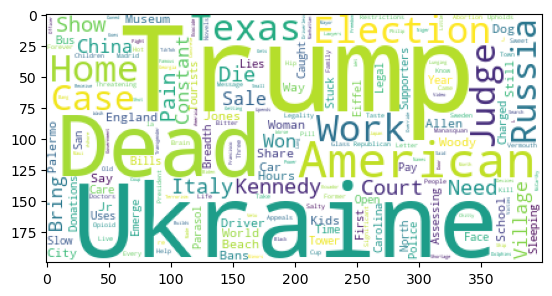

In [120]:
name_text = ' '.join(articles)

stopwords = STOPWORDS.copy()

stopwords.update(['S', 'U', 'Back', "New", 'York', 't', 'Two', 'Review', 'One', 'F', 'Bill', 'Alex', 'Robert', 'N'])

wordcloud = WordCloud(background_color="white", collocations=False, stopwords=stopwords).generate(name_text)

plt.imshow(wordcloud)

## The Wonderful World of APIs

- Scraping websites should be usually seen as a last resort when there aren't any APIs available
- Websites don't tend to like scraping as it can increases traffic flow and slows down servers
- If a website or company is large enough, they may introduce an API (Application Programming Interface) to let you get information in a way that's a win-win
- Like say... the NY Times!
- Many organizations have APIs and python wrappers are available for those APIs.
- Using the Python packages for APIs are package-specific, but they all revolve around the same underlying structure: making URL queries to the web to extract information.

## Using REST APIs

- Technically, the term API is really a general term for anything that allows for software and eases programming
- Pandas is a library with an API, for instance
- In this case, though, an API is a REST (Representational State Transfer) API interface for making web requests and getting back information (usually in the form of JSON)
- You can break down web queries into three parts: GET, HEAD, PUT, POST, DELETE

![](images/1_R8Li_PHLFdB-VyMtl8G5_w.png)

- We'll really only need GET requests
- To use the NYTimes API, go to: https://developer.nytimes.com/
- Create an account
- Once you log-in go to the top-right, to the dropdown and click "Apps"
- Create a new app
- This will have an API key that you will need
- Under APIs, authorize `Books API`

In [19]:
api_key = "K9jZ2kcQHIucNredNfV7XocRoCj1s1B4"

r = requests.get(f"https://api.nytimes.com/svc/search/v2/articlesearch.json?q=election&api-key={api_key}").content

articles = json.loads(r)

In [39]:
# articles turned the json into a dictionary
# you can traverse the dictionary by using the `keys` method
articles.keys()
# extract the titles and lead paragraphs from each article

article_dict = {}

for article in articles['response']['docs']:
    article_dict.update({article['headline']['main'] : article['lead_paragraph']})


In [42]:
def nytimes_search(query):
    api_key = "K9jZ2kcQHIucNredNfV7XocRoCj1s1B4"

    r = requests.get(f"https://api.nytimes.com/svc/search/v2/articlesearch.json?q={query}&api-key={api_key}").content

    return json.loads(r)

In [43]:
nytimes_search('trump')

{'status': 'OK',
 'copyright': 'Copyright (c) 2023 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'abstract': 'George Chidi’s cameo appearance in the indictment of Donald J. Trump in Georgia was a plot twist, but not an accident.',
    'web_url': 'https://www.nytimes.com/2023/08/17/us/politics/chidi-trump-indictment.html',
    'snippet': 'George Chidi’s cameo appearance in the indictment of Donald J. Trump in Georgia was a plot twist, but not an accident.',
    'lead_paragraph': 'The scoop of a lifetime for George Chidi, a freelance journalist in Georgia, began at the State Capitol on the morning of Dec. 14, 2020, when a longtime source walked briskly past, eyes averted as if he didn’t know him, then disappeared into Room 216.',
    'source': 'The New York Times',
    'multimedia': [{'rank': 0,
      'subtype': 'xlarge',
      'caption': None,
      'credit': None,
      'type': 'image',
      'url': 'images/2023/08/16/multimedia/16dc-chidi-01-kjlt/16dc-chid

## Recap 

- So with the REST API we got what we were looking for!
- REST APIs are everywhere, you just need to find them and see if they are available. This makes extracting information from the web easy.
- The same ideas work for FRED, or twitter (although they might also have python packages, just search google: "python twitter api")
- But sometimes scraping is the only way
    - In that case, be careful, and be a good web-citizen: use backoffs and don't make too many requests, especially if the website is small.